<a href="https://colab.research.google.com/github/AudouxH/Complexite-algorithmique-et-graphes/blob/main/Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part 4 : Line Graphs, Hamiltonian Paths, and Eulerian Paths

#### Introduction
Dans cet exercice, nous explorerons deux problèmes fondamentaux en théorie des graphes : l'existence de chemins eulériens et de chemins hamiltoniens dans un graphe. Nous examinerons également le concept de graphe adjoint (line graph) et les connexions entre ces problèmes.

#### 1) Problèmes à résoudre

##### Chemin eulérien
Un chemin eulérien dans un graphe est un chemin qui traverse chaque arête du graphe exactement une fois. Un graphe possède un chemin eulérien si et seulement si :
- Il possède exactement deux sommets de degré impair, ou
- Tous les sommets ont un degré pair et le graphe est connexe.

Source [Wikipedia](https://fr.wikipedia.org/wiki/Chemin_eul%C3%A9rien).

##### Chemin hamiltonien
Un chemin hamiltonien dans un graphe est un chemin qui traverse chaque sommet du graphe exactement une fois. Contrairement au problème eulérien, il n'existe pas de critère simple pour déterminer si un graphe possède un chemin hamiltonien, ce qui rend ce problème plus difficile à résoudre.

Source [Wikipedia](https://fr.wikipedia.org/wiki/Chemin_hamiltonien).

##### Graphe adjoint (Line Graph)
Le graphe adjoint \(L(G)\) d'un graphe \(G\) est un graphe où :
- Chaque sommet de \(L(G)\) représente une arête de \(G\).
- Deux sommets de \(L(G)\) sont adjacents si et seulement si leurs arêtes correspondantes dans \(G\) partagent un sommet commun.

En d'autres termes, le graphe adjoint transforme les arêtes du graphe original en sommets et connecte ces sommets si leurs arêtes d'origine se touchent.

Source [Wikipedia](https://fr.wikipedia.org/wiki/Graphe_adjoint).

#### 2) Illustration de la connexion

Pour illustrer la connexion entre ces concepts, nous allons créer des petits graphes aléatoires avec `networkx`, construire leurs graphes adjoints, et chercher des chemins eulériens et hamiltoniens.

##### Code pour illustrer


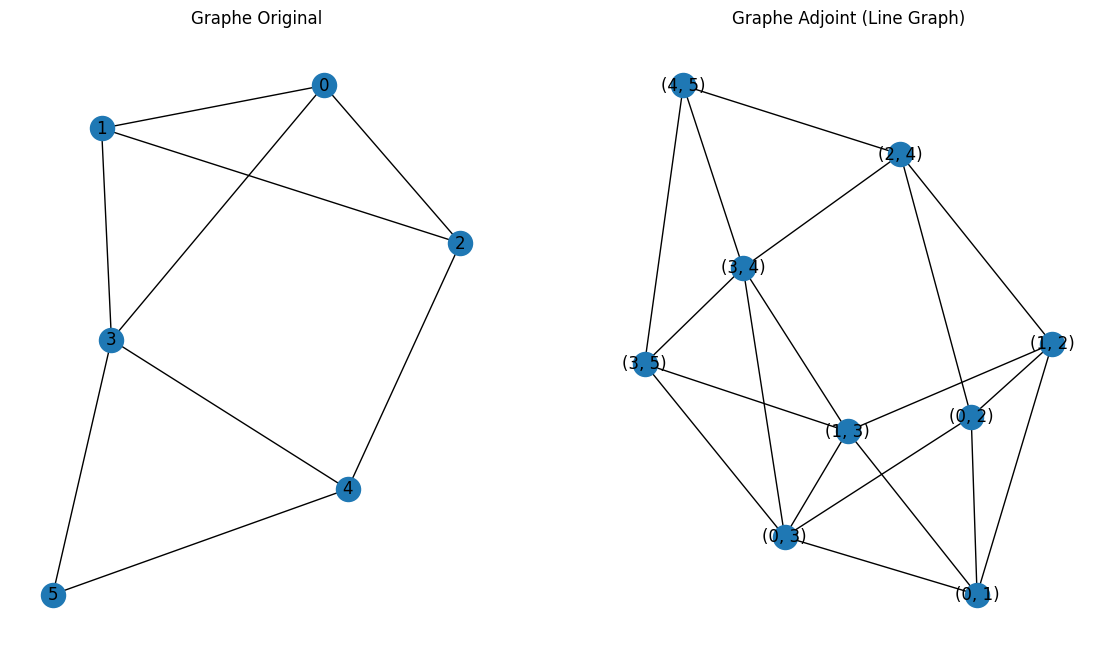

Chemin eulérien dans G: None
Chemin hamiltonien approximatif dans L(G): [(2, 4), (4, 5), (3, 5), (1, 3), (3, 4), (0, 3), (0, 2), (1, 2), (0, 2), (0, 1)]


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.approximation import traveling_salesman_problem

# Création d'un graphe aléatoire
G = nx.erdos_renyi_graph(6, 0.5)
L = nx.line_graph(G)

# Recherche de chemin eulérien
eulerian_path = list(nx.eulerian_path(G)) if nx.is_eulerian(G) else None

# Recherche de chemin hamiltonien en utilisant le problème du voyageur de commerce comme approximation
hamiltonian_path = traveling_salesman_problem(L, cycle=False)

# Affichage du graphe et de son graphe adjoint
plt.figure(figsize=(14, 8))

plt.subplot(121)
nx.draw(G, with_labels=True)
plt.title("Graphe Original")

plt.subplot(122)
nx.draw(L, with_labels=True)
plt.title("Graphe Adjoint (Line Graph)")

plt.show()

# Affichage des résultats
print("Chemin eulérien dans G:", eulerian_path)
print("Chemin hamiltonien approximatif dans L(G):", hamiltonian_path)


### Résultats et interprétation

Les graphiques montrent le graphe original (à gauche) et son graphe adjoint (à droite). Examinons les chemins eulériens et hamiltoniens trouvés dans ces graphes.

#### Résultats

1. **Chemin eulérien dans le graphe original** :
   - Le graphe original (à gauche) montre la structure de base avec des sommets et des arêtes.
   - Le chemin eulérien, s'il existe, est listé dans la sortie du programme. Dans ce cas, le graphe n'a pas de chemin eulérien car il ne remplit pas les conditions nécessaires (degré pair pour tous les sommets ou exactement deux sommets de degré impair et connexité).

2. **Chemin hamiltonien approximatif dans le graphe adjoint** :
   - Le graphe adjoint (à droite) est construit à partir du graphe original où chaque sommet représente une arête du graphe original.
   - Le chemin hamiltonien approximatif dans ce graphe adjoint est trouvé en utilisant une approximation du problème du voyageur de commerce (TSP). La sortie du programme montre la liste des sommets traversés dans ce chemin approximatif.

### Comparaison des problèmes

#### Difficulté algorithmique

- **Chemin eulérien** :
  - La vérification de l'existence d'un chemin eulérien est en \(O(V + E)\), car elle repose sur la vérification des degrés des sommets et la connexité du graphe.
  - Ce problème est donc résoluble en temps polynomial.

- **Chemin hamiltonien** :
  - La vérification de l'existence d'un chemin hamiltonien est un problème NP-complet.
  - Il n'existe pas d'algorithme polynomial connu pour résoudre ce problème dans le cas général, ce qui le rend beaucoup plus difficile du point de vue algorithmique.

### Conclusion

Bien que les chemins eulériens et hamiltoniens puissent sembler similaires, la différence de complexité algorithmique entre les deux problèmes est significative :
- Les chemins eulériens peuvent être déterminés en temps polynomial.
- Les chemins hamiltoniens sont beaucoup plus difficiles à résoudre en raison de leur nature NP-complete.
